# **The Spark Foundation**
## **Data Science and Business Analytics Internship**
### **Author: Kalash Maurya**
### **GRIP November 2021**

## **TASK #1 - Prediction using Supervised ML**
In this problem statement we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. 
We will start with simple linear regression involving two variables.

In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

DataSet Url: http://bit.ly/w-data

### Step 1: Importing the required libraries

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Step 2: # Reading data from remote link

In [7]:
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(url)
print("Data imported successfully!")

s_data.head(6)

Data imported successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


### Step 3: Checking Information present in dataset

In [8]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
s_data.info()
s_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Step 4: Plotting the distribution of scores

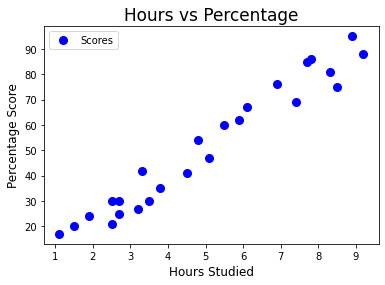

In [10]:
s_data.plot(x='Hours', y='Scores', style='bo', markersize=8)  
plt.title('Hours vs Percentage', fontsize=17)  
plt.xlabel('Hours Studied', fontsize=12)  
plt.ylabel('Percentage Score', fontsize=12)
plt.show()

*From the graph we can safely assume a positive linear relation between the number of hours studied and percentage of score.*

### Step 5: Preparing the Data
This step involves the division of data into "attributes" (inputs) and "labels" (outputs)

In [11]:
X = s_data.iloc[:,:-1].values
y = s_data.iloc[:,1].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_test)
print(y_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[20 27 69 30 62]


### Step 6: Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [13]:
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

print("Training completed.")

Training completed.


### Step 7: Plotting the regression line

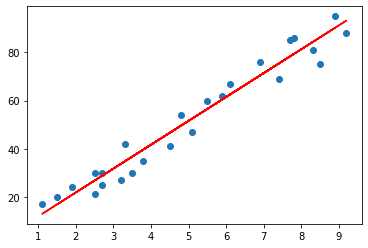

In [14]:
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y,)
plt.plot(X, line, color='red');
plt.show()

### Step 8: Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
print(X_test) # Testing data
y_pred = regressor.predict(X_test) # Model Prediction 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**Comparing Actual Values and Predicted Values**

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Step 9: Find out the percentage of a student who studies for 9.25 hrs/day

In [17]:
hours = [[9.25]]
own_pred = regressor.predict(hours)

print('No. of Hours studied = {}'.format(hours[0][0]))
print('Predicted Score = {}'.format(round(own_pred[0], 5)))

No. of Hours studied = 9.25
Predicted Score = 93.69173


**The Answer to the question is 93.7 approximately**

### Step 10: Evaluating the Model
The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
R-2: 0.9454906892105355


#### Conclusion
Looking at the evaluation results we can concluse that the model has good Mean Absolute Error and R^2 score.
### Thank You!